In [ ]:
import warnings
warnings.simplefilter('ignore')

# Análise de Séries Temporais com Python
---

## 8ª Conferência SciPy América Latina 2021

### Wilson Freitas

# Wilson Freitas

- físico
- trabalha no mercado financeiro com modelagem quantitativa
- corredor
- padeiro

# Agenda

- O que são Séries Temporais?
- Exemplos
- Séries Temporais no pandas
    - Datas no pandas
    - Leitura e manipulação de Séries Temporais
    - Resampling
    - Janelas Móveis
- Séries Temporais + Python

# O que são Séries Temporais?

## Qualquer conjunto de dados ordenados no tempo

<!-- <br>
<br>
<br>
<br>
<br>
<div style="font-size: 150%; text-align: center; margin-top: 15px; margin-bottom: 15px;">
</div>
 -->
<!-- - Objetivo
    - Estudar a dinâmica das grandezas

- Área abrangente que envolve:
    - processos estocásticos lineares estacionários
    - processos não lineares
    - processos com heterocedasticidade condicional — Modelos de Volatilidade
    - processos multivariados

- Exemplos:
    - preços de ações na Bolsa de Valores
    - dados de tráfego do estado de São Paulo
    - registro de temperatura
    - Dados de GPS: posição, frequência cardíaca
     -->

<!-- ## >>> Trazer exemplos com gráficos -->


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 6.0)
import statsmodels.api as sm
import statsmodels.tsa as tsa
from bcb import sgs, currency
import yfinance as yf
import datetime

# Séries Temporais

- Diversas grandesas, que podem ser salvas ao longo do tempo, através de sensores ou obtidos diretamente da Internet.
    - Dados de relógios (temperatura, frequência cardiaca, ...)
    - Dados de clima
    - Dados de negociação de ativos financeiros (preços, negócios, volume)
    - Logs de rede/Acessos

- Séries Temporais é uma disciplina altamente empírica.

- Usa muito a **Inferência Estatística**.

# Exemplos

# Inflação

- Séries Temporais de Inflação (IPCA - IBGE)
- Dados mensais

In [ ]:
df = sgs.get(433, start_date='2000-01-01')
df.plot();

# Vendas no Varejo

- Dados mensais de vendas no varejo.

- Dados de vendas costumam apresentar sazonalidade.

In [ ]:
df = pd.read_csv('data/example_retail_sales.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.plot(x='ds', y='y');

# Ibovespa

- O Ibovespa é o índice de ações mais importante do Brasil, com cotações diárias desde 1986.

- Resultado de uma carteira teórica de ações negociadas na B3.

In [ ]:
df = yf.download('^BVSP', start='2018-01-01', end='2021-11-30', progress=False)
df['Adj Close'].plot(title='Ibovespa', xlabel='');

# Moedas no Mundo

- Séries Temporais Multivariadas de moedas

In [ ]:
df = currency.get(['USD', 'GBP', 'EUR', 'CAD'], start_date='2019-01-01', end_date='2021-11-01')
df.plot();

# Logs do Wikipedia

- Séries Temporais do log diário de page views da página da Peyton Manning (american football quarterback)

In [ ]:
df = pd.read_csv('data/example_wp_log_peyton_manning.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.plot(x='ds', y='y', style='o', ms=2);

# Yosemite National Park Temperatures

- Dados intradiários

In [ ]:
df = pd.read_csv('data/example_yosemite_temps.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.plot(x='ds', y='y', style='o', ms=1);

# Negócios da VALE3

- Dados intradiários não regulares

In [ ]:
df = pd.read_parquet('data/VALE3_trade_intraday_20211209.parquet')
df.plot(x='time', y='price');

### But be careful
- http://twentytwowords.com/funny-graphs-show-correlation-between-completely-unrelated-stats-9-pictures/
- https://www.fastcompany.com/3030529/hilarious-graphs-prove-that-correlation-isnt-causation

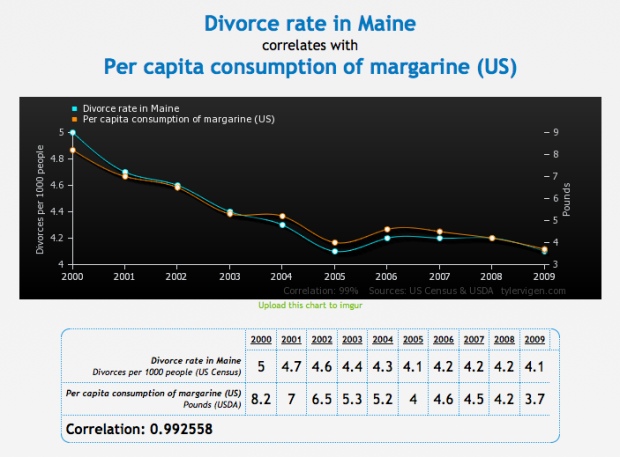


- https://flowingdata.com/2014/05/12/random-things-that-correlate/

# Como trabalhar com Séries Temporais?

![image.png](images/pandas-logo.png)

# pandas

- Séries Temporais são DataFrames do pandas.

In [ ]:
df = currency.get(['USD', 'GBP', 'EUR', 'CAD'], start_date='2021-11-01', end_date='2021-11-10')
df

- O *tempo* é o índice do DataFrame.

- O índice pode ser transformado em uma coluna.

In [ ]:
df.reset_index()

# Trabalhando com datas

Tipos de data do pandas.

1. **Date times**: Tipo data-hora semelhante a `datetime.datetime` da standard library.
2. **Time deltas**: Tipo de duração semelhante a `datetime.timedelta` da standard library.
3. **Time spans**: Intervalo de tempos como meses e trimestres, por exemplo.
4. **Date offsets**: Intervalos de tempo semelhantes a `dateutil.relativedelta.relativedelta` do pacote `dateutil`.



<table class="table">
<colgroup>
<col style="width: 15%">
<col style="width: 12%">
<col style="width: 13%">
<col style="width: 31%">
<col style="width: 28%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Concept</p></th>
<th class="head"><p>Scalar Class</p></th>
<th class="head"><p>Array Class</p></th>
<th class="head"><p>pandas Data Type</p></th>
<th class="head"><p>Primary Creation Method</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>Date times</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Timestamp</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DatetimeIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">datetime64[ns]</span></code> or <code class="docutils literal notranslate"><span class="pre">datetime64[ns,</span> <span class="pre">tz]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">to_datetime</span></code> or <code class="docutils literal notranslate"><span class="pre">date_range</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>Time deltas</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Timedelta</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">TimedeltaIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">timedelta64[ns]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">to_timedelta</span></code> or <code class="docutils literal notranslate"><span class="pre">timedelta_range</span></code></p></td>
</tr>
<tr class="row-even"><td><p>Time spans</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Period</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">PeriodIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">period[freq]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Period</span></code> or <code class="docutils literal notranslate"><span class="pre">period_range</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>Date offsets</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DateOffset</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">None</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">None</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DateOffset</span></code></p></td>
</tr>
</tbody>
</table>

- [Time series / date functionality - pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

# Timestamp

- `Timestamp` is a scalar type that represents a single time stamp.

In [ ]:
pd.to_datetime('2021-11-21') # ISO format always works

In [ ]:
pd.to_datetime('11/12/2021')

In [ ]:
pd.to_datetime('12/11/2021', dayfirst=True)

In [ ]:
pd.to_datetime('12/14/2021', dayfirst=True) # dayfirst isn't strict

In [ ]:
pd.to_datetime('December 11, 2021') # it also parses long dates

# Timestamp

In [ ]:
pd.to_datetime('2021-11-21 13:00:00') # ISO format always works

In [ ]:
pd.to_datetime('11/12/2021 13:00')

In [ ]:
pd.to_datetime('12/11/2021 13', dayfirst=True)

In [ ]:
pd.to_datetime(datetime.datetime(2021, 12, 14, 13)) # also accepts datetime.datetime

# Timestamp NULL type

- `pd.NaT` represents null date times, time deltas, and time spans.

- Useful for representing missing or null date like values.

In [ ]:
pd.Timestamp(None)

In [ ]:
pd.to_datetime(pd.NaT)

In [ ]:
pd.to_datetime(pd.NaT) == pd.NaT

# Timestamp as array

In [ ]:
pd.to_datetime(['2021 Dec 14', '14/12/2021', '12/14/2021', 'December 14, 2021',
                '2021-12-14', '2021/12/14', None], dayfirst=True)

In [ ]:
pd.to_datetime(pd.Series(['2021 Dec 14', '14/12/2021', '12/14/2021', 'December 14, 2021',
                '2021-12-14', '2021/12/14', None]), dayfirst=True)

# Generating ranges of time stamps

- `date_range` generates DatetimeIndex

In [ ]:
pd.date_range('2021-12-01', '2021-12-11')

In [ ]:
pd.date_range('2021-12-01', periods=5) # daily ranges

In [ ]:
pd.date_range('2021-12-01', periods=5, freq='M') # monthly ranges

# Generating ranges of time stamps



In [ ]:
pd.date_range('2021-12-01', '2021-12-11', freq='B') # only business days

In [ ]:
pd.date_range('2021-12-01', periods=5, freq='BM') # business days for month end frequency

In [ ]:
pd.date_range('2021-12-01', periods=5, freq='BMS') # business days for monthly start frequency

# Supported frequencies (`freq` argument)

<table class="colwidths-given table">
<colgroup>
<col style="width: 13%">
<col style="width: 87%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Alias</p></th>
<th class="head"><p>Description</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>B</p></td>
<td><p>business day frequency</p></td>
</tr>
<tr class="row-odd"><td><p>C</p></td>
<td><p>custom business day frequency</p></td>
</tr>
<tr class="row-even"><td><p>D</p></td>
<td><p>calendar day frequency</p></td>
</tr>
<tr class="row-odd"><td><p>W</p></td>
<td><p>weekly frequency</p></td>
</tr>
<tr class="row-even"><td><p>M</p></td>
<td><p>month end frequency</p></td>
</tr>
<tr class="row-odd"><td><p>SM</p></td>
<td><p>semi-month end frequency (15th and end of month)</p></td>
</tr>
<tr class="row-even"><td><p>BM</p></td>
<td><p>business month end frequency</p></td>
</tr>
<tr class="row-odd"><td><p>CBM</p></td>
<td><p>custom business month end frequency</p></td>
</tr>
<tr class="row-even"><td><p>MS</p></td>
<td><p>month start frequency</p></td>
</tr>
<tr class="row-odd"><td><p>SMS</p></td>
<td><p>semi-month start frequency (1st and 15th)</p></td>
</tr>
<tr class="row-even"><td><p>BMS</p></td>
<td><p>business month start frequency</p></td>
</tr>
<tr class="row-odd"><td><p>CBMS</p></td>
<td><p>custom business month start frequency</p></td>
</tr>
<tr class="row-even"><td><p>Q</p></td>
<td><p>quarter end frequency</p></td>
</tr>
<tr class="row-odd"><td><p>BQ</p></td>
<td><p>business quarter end frequency</p></td>
</tr>
<tr class="row-even"><td><p>QS</p></td>
<td><p>quarter start frequency</p></td>
</tr>
<tr class="row-odd"><td><p>BQS</p></td>
<td><p>business quarter start frequency</p></td>
</tr>
<tr class="row-even"><td><p>A, Y</p></td>
<td><p>year end frequency</p></td>
</tr>
<tr class="row-odd"><td><p>BA, BY</p></td>
<td><p>business year end frequency</p></td>
</tr>
<tr class="row-even"><td><p>AS, YS</p></td>
<td><p>year start frequency</p></td>
</tr>
<tr class="row-odd"><td><p>BAS, BYS</p></td>
<td><p>business year start frequency</p></td>
</tr>
<tr class="row-even"><td><p>BH</p></td>
<td><p>business hour frequency</p></td>
</tr>
<tr class="row-odd"><td><p>H</p></td>
<td><p>hourly frequency</p></td>
</tr>
<tr class="row-even"><td><p>T, min</p></td>
<td><p>minutely frequency</p></td>
</tr>
<tr class="row-odd"><td><p>S</p></td>
<td><p>secondly frequency</p></td>
</tr>
<tr class="row-even"><td><p>L, ms</p></td>
<td><p>milliseconds</p></td>
</tr>
<tr class="row-odd"><td><p>U, us</p></td>
<td><p>microseconds</p></td>
</tr>
<tr class="row-even"><td><p>N</p></td>
<td><p>nanoseconds</p></td>
</tr>
</tbody>
</table>

# Period (time spans)

- The span represented by Period can be specified explicitly, or inferred from datetime string format.

In [ ]:
pd.Period('2021-11')

In [ ]:
pd.Period(2021)

In [ ]:
pd.Period(2021, freq='D')

In [ ]:
pd.period_range('2021', freq='Y', periods=6)

In [ ]:
pd.period_range('2021', freq='M', periods=6)

# Timezone

In [ ]:
pd.date_range('2021-12-01 18', periods=12, freq='1H')

In [ ]:
pd.date_range('2021-12-01 18', periods=12, freq='1H', tz='UTC')

In [ ]:
pd.date_range('2021-12-01 18', periods=12, freq='1H', tz='UTC').tz_convert('America/Sao_Paulo')

# Carregando dados

- Carregar os dados

In [ ]:
df = pd.read_csv('data/example_retail_sales.csv')
df.dtypes

- Formatar os dados

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.dtypes

- Definir o índice

In [ ]:
df = df.set_index('ds')
df.head()

# Carregando dados com Time spans

- Carregar os dados

In [ ]:
df = pd.read_csv('data/champagne_sales.csv')
df.dtypes

- Formatar os dados

In [ ]:
df['Month'] = pd.PeriodIndex(df['Month'], freq='M')
df['Month'].head()

- Definir o índice

In [ ]:
dfi = df.set_index('Month')
dfi.head()

# Trabalhando com timezones

In [ ]:
df = pd.read_csv('data/example_yosemite_temps.csv')
df.head()

In [ ]:
df['ds'] = pd.DatetimeIndex(df['ds'], tz='US/Alaska')
df.head()

In [ ]:
df.set_index('ds').head()

# Resampling

- Converter as Séries Temporais em diferentes frequências.

<!-- - 
Returns the original data conformed to a new index with the specified frequency.

If the index of this DataFrame is a PeriodIndex, the new index is the result of transforming the original index with PeriodIndex.asfreq (so the original index will map one-to-one to the new index).

Otherwise, the new index will be equivalent to pd.date_range(start, end, freq=freq) where start and end are, respectively, the first and last entries in the original index (see pandas.date_range()). The values corresponding to any timesteps in the new index which were not present in the original index will be null (NaN), unless a method for filling such unknowns is provided (see the method parameter below).
 -->

In [ ]:
df = pd.read_csv('data/example_wp_log_peyton_manning.csv')
df['ds'] = pd.to_datetime(df['ds'])
dfi = df.set_index('ds')
dfi.shape

- O método `asfreq` retorna um DataFrame com os dados na frequência especificada.

In [ ]:
dfw = dfi.asfreq('1W')
dfw.shape

In [ ]:
dfw.head()

In [ ]:
ax = dfi.plot(alpha=0.5)
dfw.plot(ax=ax);

# Resampling with `resample`

In [ ]:
df = pd.read_csv('data/champagne_sales.csv')
df['Month'] = pd.PeriodIndex(df['Month'], freq='M')
dfi = df.set_index('Month')

- O método `resample` reagrupa os dados na frequência especificada.

In [ ]:
dfm = dfi.resample('Y').mean()
dfm

In [ ]:
dfs = dfi.resample('Y').std()
dfm.merge(dfs, left_index=True, right_index=True, suffixes=('_mean', '_std'))

# Análise em Janelas Móveis

- Fazer a avaliação de uma estatística em datasets de tamanho específico avançando no tempo.

In [ ]:
df = pd.read_csv('data/example_wp_log_peyton_manning.csv')
df['ds'] = pd.to_datetime(df['ds'])
dfi = df.set_index('ds')

- O método `rolling` faz o agrupamento das séries na janela especificada.

In [ ]:
rw = dfi.rolling(window=30)

In [ ]:
dfi.plot(alpha=0.5)
rw.mean()['y'].plot();

In [ ]:
dfi.asfreq('W').plot(alpha=0.5)
rw.mean()['y'].plot();

# Médias Móveis em Análise Técnica

- As médias móveis dos preços de ações são utilizados em Análise Técnica de Investimentos na identificação de oportunidades de compra e venda.

In [ ]:
df = yf.download('^BVSP', start='2020-07-01', end='2021-11-30', progress=False)
close = df['Adj Close']

- Calculamos as médias móveis
    - 5 dias úteis (aprox. 1 semana)
    - 21 dias úteis (apox. 1 mês)

In [ ]:
mm5 = close.rolling(window=5).mean()
mm21 = close.rolling(window=21).mean()

In [ ]:
close.plot(alpha=0.5)
mm5.plot()
mm21.plot();

# Estratégia

- Média móvel curta indica tendência de curto prazo.
- Média móvel longa indica tendência de longo prazo.
- Quando a média móvel curva cruza a longa, *acredita-se* que há uma inversão de tendência.
    - Essa inversão de tendência indica oportunidade de compra ou venda.

# Identificando outliers

- Algumas séries de ações apresentam variações diárias muito discrepantes.

- Isso em geral está relacionado a algum evento externo e não diretamente a negociação.

- Dessa maneira, é necessário mapear estes eventos para avaliar o tratamento dados aos ativos.

In [ ]:
series = yf.download('WIZS3.SA', start='2015-01-01', end='2021-11-30', progress=False)
close = series['Adj Close']
ret = close.pct_change()
ret.plot(xlabel='');

- Note que temos variações diárias em torno de 20% para algumas datas.

- Utilizamos a distribuição t-Studend para as variações diárias.

- Estimamos os parâmetros da distribuição em uma janela móvel de 756 dias úteis (aprox. 3 anos).

- Avaliamos a evolução das estimativas dos graus de liberdade da distribuição.

In [ ]:
from scipy.stats import t

In [ ]:
rw = ret.rolling(window=756)
ret_tdf = rw.apply(lambda x: t.fit(x.values)[0]).dropna()
ret_std = np.sqrt(252) * rw.std().dropna()

In [ ]:
ax = ret_tdf.plot(figsize=(16, 3))
ax.set_title('Graus de Liberdade Distribuição t-Student');
plt.axhline(3, color='grey');

In [ ]:
ax = ret.loc[ret_std.index].plot(figsize=(16, 3));
ret_std.plot()
ax.set_title('Evolução do Desvio Padrão');

- Tipicamente o parâmetro de graus de liberdade não apresenta valores menores que 3, logo, quando isso acontece, requer uma avaliação.

# Expanding

In [ ]:
df = pd.DataFrame(np.random.randn(720, 3), index = pd.date_range('2020-01-01', freq='D', periods=720), columns = ['A', 'B', 'C'])
df.head()

In [ ]:
df.expanding(min_periods = 1).mean().plot()

# Séries Temporais + Python

# `statsmodels`

https://www.statsmodels.org/

- Um pacote que implementa diversos modelos de estimação, testes estatísticos e funções para exploração de dados.

- É um pacote com um forte viés para quem pratica Econometria.
    - Implementa diversos modelos de regressão multivariada.
    
- É bastante influenciado pelo R.

<!-- - Linear regression models
- Generalized linear models
- Discrete choice models
- Robust linear models
- Many models and functions for time series analysis
- Nonparametric estimators
- A collection of datasets for examples
- A wide range of statistical tests
- Input-output tools for producing tables in a number of formats (Text, LaTex, HTML) and for reading Stata files into NumPy and Pandas.
- Plotting functions
- Extensive unit tests to ensure correctness of results -->

# Exemplo: Regressão Linear por Mínimos Quadrados Ordinários

In [ ]:
series = yf.download(['ITUB4.SA', '^BVSP'], start='2018-01-01', end='2021-11-30', progress=False)
close = series['Adj Close'].rename(columns={'^BVSP': 'IBOVESPA', 'ITUB4.SA': 'ITUB4'})
ret = close.pct_change().dropna()
ret.plot(x='IBOVESPA', y='ITUB4', style='o', xlabel='IBOVESPA', ylabel='ITUB4', legend=None, alpha=0.5, ms=3);

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols('ITUB4 ~ IBOVESPA', data=ret)
results = model.fit()

In [ ]:
print(results.summary())

In [ ]:
fig, ax = plt.subplots()
ax.plot(ret['IBOVESPA'], ret['ITUB4'], 'o', label='data', alpha=0.5, ms=3)
pred_ols = results.get_prediction()
ax.plot(ret['IBOVESPA'], results.fittedvalues, "r-", label="OLS")
ax.legend(loc="best");

# Diagnósticos da Regressão

- Teste de Normalidade dos Resíduos

In [ ]:
import statsmodels.stats.api as sms

name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(results.resid)
list(zip(name, test))

# Regressão com Variáveis Dummy

![](images/examples_notebooks_generated_ols_26_0.png)

<https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html>

# Diversos outros para Regressão

## Estimação

- Mínimos Quadrados Ponderados
- Técnicas de Estimação Robusta
- Mínimos Quadrados Generalizados
- Estimação em Janela Móvel

## Modelos

- Regressão Quantílica
- Modelos de Espaço de Estados
- Modelos de Efeitos Mistos

# Modelos para Séries Temporais

- `statsmodels` tem o Modelo ARIMA com algumas técnicas de estimação diferentes implementadas.

## Modelos ARIMA

- Modelos univariados que tentam explorar as relações implícitas nas variáveis.
    - Avaliam a **Autocorrelação** - correlação linear da variável com ela mesma só que deslocada no tempo.
- São modelos de Séries Temporais para variáveis estacionárias - *tipicamente sem tendência*.

<!-- - **AR**: **Autoregressivo** - o passado explica o futuro
- **I**: **Integrado** - é necessário aplicar diferenças nas variáveis para tornar as variáveis estacionárias
- **MA**: **Média Móvel** - os erros de estimação do passado explicam o futuro -->

# Funções de Autocorrelação `acf` e Autocorrelação parcial `pacf`

In [ ]:
from statsmodels.tsa.api import acf, pacf

In [ ]:
def acf_pacf(x):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=40, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=40, ax=ax2)

# Ruído Branco

In [ ]:
rb = np.random.randn(1000)

In [ ]:
plt.plot(rb);

# Funções `acf` e `pacf` de um Ruído Branco

In [ ]:
acf_pacf(rb)

# Série Não Estacionária (séries com tendência)

- O somatório acumulado do Ruído Branco é um processo não estacionário

In [ ]:
tv = np.cumsum(rb)

In [ ]:
plt.plot(tv);

# Funções `acf` e `pacf` de uma Séries Não Estacionária

In [ ]:
acf_pacf(tv)

# Séries com Sazonalidade

- Séries Temporais de Venda no Varejo costumam apresentar sazonalidade

In [ ]:
df = pd.read_csv('data/example_retail_sales.csv')
df['ds'] = pd.PeriodIndex(df['ds'], freq='M')
dfi = df.set_index('ds')

In [ ]:
dfi.plot();

- A função de autocorrelação apresenta os efeitos da tendência
- A autocorrelação parcial dá indícios de que temos sazonalidade no ciclo de 12 meses

In [ ]:
acf_pacf(dfi)

# Tomando diferenças

- Tomando a diferença, elemento a elemento da série, conseguimos remover a tendência.

In [ ]:
dfi.diff().dropna().plot();

- Na função de autocorrelação os lags de 12, 24, 36 apresentam valores muito significativos confirmando o ciclo de sazonalidade de 12 meses.

In [ ]:
acf_pacf(dfi.diff().dropna())

In [ ]:
dfx = dfi.diff().dropna()

train_size = int(dfx.shape[0] * 0.5)
train, test = train_test_split(dfx, train_size=train_size)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

In [ ]:
x = np.arange(dfx.shape[0])
plt.plot(x[train_size:], forecasts, 'r-', ms=3)
plt.plot(x, dfx.values, c='grey', alpha=0.5);

# Fazendo previsões com ARIMA

- O pacote `pmdarima` encontra o modelo ARIMA.

- Fortemente inspirado pela função `auto.arima` do R.

In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

- Separa os dados em treino e teste

In [ ]:
train_size = int(dfi.shape[0] * 0.5)
train, test = train_test_split(dfi, train_size=train_size)

- Estima o modelo indicando que há sazonalidade e que o ciclo é de 12 meses

In [ ]:
model = pm.auto_arima(train, seasonal=True, m=12)

- Faz a previsão no período de teste

In [ ]:
forecasts = model.predict(test.shape[0])

In [ ]:
x = np.arange(dfi.shape[0])
plt.plot(x[train_size:], forecasts, 'r-', ms=3)
plt.plot(x, dfi.values, c='grey', alpha=0.5);

In [ ]:
print(model.summary())

# Modelos de Volatilidade

In [ ]:
from arch import arch_model

In [ ]:
series = yf.download('^BVSP', start='2015-01-01', end='2021-11-30', progress=False)
close = series['Adj Close'].rename('IBOVESPA_CLOSE')
ret = close.pct_change().dropna().rename('IBOVESPA_RETURNS')

In [ ]:
am = arch_model(100 * ret)
res = am.fit(disp='off')
print(res.summary())

In [ ]:
fig = res.plot(annualize="D")

In [ ]:
split_date = datetime.datetime(2018,1,1)
res = am.fit(last_obs=split_date, disp='off')

In [ ]:
print(res.summary())

In [ ]:
fig = res.plot(annualize="D")

In [ ]:
forecasts = res.forecast(horizon=5, start=split_date)
np.sqrt(forecasts.variance[split_date:] * 252).plot()

In [ ]:
forecasts = res.forecast(horizon=10, start=split_date, method='simulation')

In [ ]:
sim_paths = forecasts.simulations.residual_variances[-1].T

In [ ]:
x = np.arange(1, 11)
plt.plot(x, np.sqrt(252 * sim_paths), color='grey', alpha=0.05);
plt.plot(
    x, np.sqrt(252 * forecasts.residual_variance.iloc[-1]), color="k", alpha=1
)
plt.title("Model-based Simulation")
plt.xticks(np.arange(1, 11))
plt.xlim(1, 10)
plt.show()
# plt.ylim(20, 100)

# FIM

- Twitter: `@aboutwilson`
- LinkedIn: <https://www.linkedin.com/in/wilson-freitas/>